In [45]:
import pandas as pd
import os
from model_script import perform_preprocessing, read_txt_file, read_sentences

In [6]:
path = "../BRAT_Data/Ukraine_after/Articles_for_Ania/2022-06-08_DIPLOMACY_China,_Central_Asia_agree_on_broad_cooperation_cov.txt"
df = perform_preprocessing(path)
df

C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5.0 and may not be 100% compatible with the current version (3.8.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


,annotation_category,annotation,entity,sentence,entity_atomized
0,blame,the region's most acute challenges of an econo...,"Russia-Ukraine conflict,",Chinese analysts said the outcomes addressed t...,Russia
1,blame,the region's most acute challenges of an econo...,"Russia-Ukraine conflict,",Chinese analysts said the outcomes addressed t...,Ukraine
2,praise,achieved fruitful cooperation and broad consen...,China and five Central Asian countries,China and five Central Asian countries achieve...,Central Asian
3,praise,achieved fruitful cooperation and broad consen...,China and five Central Asian countries,China and five Central Asian countries achieve...,China
4,praise,achieved fruitful cooperation and broad consen...,China and five Central Asian countries,China and five Central Asian countries achieve...,Asia
5,blame,Central Asian countries face great challenges ...,the Russia-Ukraine conflict,"Qian Feng, director of the research department...",Russia
6,blame,Central Asian countries face great challenges ...,the Russia-Ukraine conflict,"Qian Feng, director of the research department...",Ukraine
7,blame,The region has also been under great pressure ...,US,The region has also been under great pressure ...,US
8,blame,some regional countries are worried about poss...,the US,The region has also been under great pressure ...,US
9,praise,Cooperation with China has addressed the pragm...,China,Cooperation with China has addressed the pragm...,China


In [46]:
directory = "../BRAT_Data/Ukraine_after/Articles_for_Ania"
#remove warnings
import warnings
warnings.filterwarnings("ignore")

all_dataframes_Ania = []
all_sentences_Ania = []

for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        print(file_path)
        df = perform_preprocessing(file_path)
        sentences_df = read_sentences(read_txt_file(file_path))['text']
        all_sentences_Ania.append(sentences_df)
        all_dataframes_Ania.append(df)

../BRAT_Data/Ukraine_after/Articles_for_Ania\2022-06-06_OBSERVER_US_upgrading_arms_to_Ukraine_reveals_selfish_forei.txt
../BRAT_Data/Ukraine_after/Articles_for_Ania\2022-06-06_VIEWPOINT_US_policy_of__technological_apartheid__could_lead_.txt
../BRAT_Data/Ukraine_after/Articles_for_Ania\2022-06-07_AMERICAS__No_longer_US__backyard,__Latin_America_sends_unit.txt
../BRAT_Data/Ukraine_after/Articles_for_Ania\2022-06-07_CROSS-BORDERS_Ukraine,_Moldova_agree_to_facilitate_border_crossi.txt
../BRAT_Data/Ukraine_after/Articles_for_Ania\2022-06-08_DIPLOMACY_China,_Central_Asia_agree_on_broad_cooperation_cov.txt
../BRAT_Data/Ukraine_after/Articles_for_Ania\2022-06-08_DIPLOMACY_European_Parliament_s_latest_report_concerning_Chi.txt
../BRAT_Data/Ukraine_after/Articles_for_Ania\2022-06-08_ECONOMY_China_harvests_over_half_of_summer_crop,_11.13_mln.txt
../BRAT_Data/Ukraine_after/Articles_for_Ania\2022-06-08_ECONOMY_Japanese_yen_may_fall_further,_risking_safe_haven_.txt
../BRAT_Data/Ukraine_after/Article

In [47]:
directory = "../BRAT_Data/Ukraine_after/Articles_for_Agnieszka"
#remo

all_dataframes_Agnieszka = []
all_sentences_Agnieszka = []

for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        print(file_path)
        df = perform_preprocessing(file_path)
        sentences_df = read_sentences(read_txt_file(file_path))['text']
        all_sentences_Agnieszka.append(sentences_df)
        all_dataframes_Agnieszka.append(df)

../BRAT_Data/Ukraine_after/Articles_for_Agnieszka\2022-06-06_ASIAN_REVIEW_A_mission_impossible_for_the_US_to_woo_Asia-Pacifi.txt
../BRAT_Data/Ukraine_after/Articles_for_Agnieszka\2022-06-07_DIPLOMACY_Chinese_envoy_warns_against_providing_weapons_to_U.txt
../BRAT_Data/Ukraine_after/Articles_for_Agnieszka\2022-06-07_DIPLOMACY_Wang_Yi_meets_with_Kazakh_president,_stresses_vigi.txt
../BRAT_Data/Ukraine_after/Articles_for_Agnieszka\2022-06-07_ECONOMY_US_behind_global_grain_crises__Chinese_FM_spokespe.txt
../BRAT_Data/Ukraine_after/Articles_for_Agnieszka\2022-06-08_COLUMNISTS_China-EU_economic_ties_on_brink_of_an_ideological_.txt
../BRAT_Data/Ukraine_after/Articles_for_Agnieszka\2022-06-08_ECONOMY_China_issues_certification_standards_for_GM_crops_.txt
../BRAT_Data/Ukraine_after/Articles_for_Agnieszka\2022-06-08_EUROPE_Ukraine_says_in_talks_with_UN_over_humanitarian_co.txt
../BRAT_Data/Ukraine_after/Articles_for_Agnieszka\2022-06-08_EYE_ON_WORLD__UN_calls_for_Somalia_drought_relief.txt
../BRA

In [49]:
merged_dataframe = pd.concat(all_dataframes_Ania + all_dataframes_Agnieszka, ignore_index=True)
merged_dataframe

,annotation_category,annotation,entity,sentence,entity_atomized
0,blame,"new arms deliveries to Kiev are aimed at ""prol...",US,Speaking to the Rossiya-1 state television cha...,US
1,blame,has been sending more advanced and heavier wea...,US,"From the beginning, the US has been sending mo...",US
2,blame,clearly knows that a prolonged conflict betwee...,US,The US clearly knows that a prolonged conflict...,US
3,blame,has put its national interests into considerat...,US,The US has put its national interests into con...,US
4,blame,"With self-interests in mind, the US will not s...",US,"With self-interests in mind, the US will not s...",US
...,...,...,...,...,...
419,blame,"US inflation will become higher, ordinary peop...",If the US does prohibit oil exports to China,The US only has itself to blame for the curren...,China
420,blame,"would undermine US oil companies, and they wil...",Prohibiting the export of oil and petroleum pr...,Prohibiting the export of oil and petroleum pr...,US
421,blame,"would undermine US oil companies, and they wil...",Prohibiting the export of oil and petroleum pr...,Prohibiting the export of oil and petroleum pr...,China
422,blame,are doomed to be unpopular,political calculations by politicians like Rub...,Such political calculations by politicians lik...,Scott


In [60]:
merged_sentences = pd.DataFrame(pd.concat(all_sentences_Ania + all_sentences_Agnieszka, ignore_index=True))
merged_sentences = merged_sentences.rename(columns={'text': 'sentence'})
merged_sentences

,sentence
0,Speaking to the Rossiya-1 state television cha...
1,"""Putin's remarks came a few days after US Pres..."
2,"""Putin did not specify which targets he meant."
3,"Song Zhongping, a Beijing-based military exper..."
4,"From the beginning, the US has been sending mo..."
...,...
12796,"That must be respected, as we would expect Chi..."
12797,"Of course, one can have opinions on these things."
12798,One can even make criticisms if one wants.
12799,But they shouldn't interfere in state relation...


In [61]:
# One-hot encode the 'annotation_category' column for 'blame' and 'praise'
one_hot = pd.get_dummies(merged_dataframe['annotation_category'], columns=['blame', 'praise'])
merged_dataframe = pd.concat([merged_dataframe, one_hot[['blame', 'praise']]], axis=1)
merged_dataframe

,annotation_category,annotation,entity,sentence,entity_atomized,blame,praise
0,blame,"new arms deliveries to Kiev are aimed at ""prol...",US,Speaking to the Rossiya-1 state television cha...,US,1,0
1,blame,has been sending more advanced and heavier wea...,US,"From the beginning, the US has been sending mo...",US,1,0
2,blame,clearly knows that a prolonged conflict betwee...,US,The US clearly knows that a prolonged conflict...,US,1,0
3,blame,has put its national interests into considerat...,US,The US has put its national interests into con...,US,1,0
4,blame,"With self-interests in mind, the US will not s...",US,"With self-interests in mind, the US will not s...",US,1,0
...,...,...,...,...,...,...,...
419,blame,"US inflation will become higher, ordinary peop...",If the US does prohibit oil exports to China,The US only has itself to blame for the curren...,China,1,0
420,blame,"would undermine US oil companies, and they wil...",Prohibiting the export of oil and petroleum pr...,Prohibiting the export of oil and petroleum pr...,US,1,0
421,blame,"would undermine US oil companies, and they wil...",Prohibiting the export of oil and petroleum pr...,Prohibiting the export of oil and petroleum pr...,China,1,0
422,blame,are doomed to be unpopular,political calculations by politicians like Rub...,Such political calculations by politicians lik...,Scott,1,0


In [72]:
final_df = merged_dataframe[['sentence', 'blame', 'praise']]
final_df = merged_sentences.merge(final_df, left_on='sentence', right_on='sentence', how='left')
final_df = final_df.fillna(0)
final_df['blame'] = final_df['blame'].astype(int)
final_df['praise'] = final_df['praise'].astype(int)
final_df

,sentence,blame,praise
0,Speaking to the Rossiya-1 state television cha...,1,0
1,"""Putin's remarks came a few days after US Pres...",0,0
2,"""Putin did not specify which targets he meant.",0,0
3,"Song Zhongping, a Beijing-based military exper...",0,0
4,"From the beginning, the US has been sending mo...",1,0
...,...,...,...
12973,"That must be respected, as we would expect Chi...",0,0
12974,"Of course, one can have opinions on these things.",0,0
12975,One can even make criticisms if one wants.,0,0
12976,But they shouldn't interfere in state relation...,0,0


In [122]:
# Balance the final_df
blame_df = final_df[final_df['blame'] == 1]
praise_df = final_df[final_df['praise'] == 1]
neutral_df = final_df[(final_df['blame'] == 0) & (final_df['praise'] == 0)]

# Calculate the minimum size to balance the classes
min_size = min(len(blame_df), len(praise_df))
max_size = max(len(blame_df), len(praise_df))


neutral_sampled = neutral_df.sample(3*len(blame_df), random_state=42)
final_balanced_df = pd.concat([blame_df, praise_df, neutral_sampled], ignore_index=True)
final_balanced_df = final_balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
final_balanced_df

,sentence,blame,praise
0,"After Ukraine, US-led NATO wants to turn Asia ...",1,0
1,Xi's choice to go to Hong Kong by high-speed r...,0,0
2,The 82-year-old is fighting hard to gain more ...,0,0
3,"""If the EU wants to import lots of LNG from th...",1,0
4,"But it is important for China and Russia, as w...",0,1
...,...,...,...
595,With the continuation of the Russia-Ukraine co...,1,0
596,"""Since ""decoupling"" was triggered by the US-la...",1,0
597,Bringing Africa to the path of confrontation o...,0,0
598,"In December 2020, the Commission Nationale de ...",0,0


Epoch 1/4
8/8 [==============================] - 4s 217ms/step - loss: 1.2624 - recall: 1.0000 - val_loss: 1.1455 - val_recall: 1.0000
Epoch 2/4
8/8 [==============================] - 1s 134ms/step - loss: 0.9803 - recall: 1.0000 - val_loss: 0.8888 - val_recall: 1.0000
Epoch 3/4
8/8 [==============================] - 1s 134ms/step - loss: 0.8359 - recall: 1.0000 - val_loss: 0.7992 - val_recall: 1.0000
Epoch 4/4
4/4 [==============================] - 0s 31ms/step - loss: 0.7544 - recall: 1.0000
Test Accuracy: 100.00%
4/4 [==============================] - 1s 28ms/step
Confusion Matrix:
[[ 0 99]
 [ 0 21]]


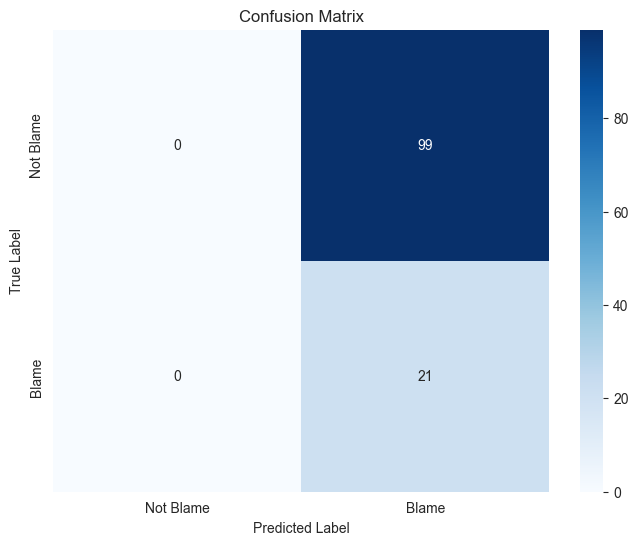

In [136]:
import pandas as pd
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.metrics import Recall
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# One-hot encode the 'annotation_category' column for 'blame' and 'praise'
df_to_train = final_balanced_df[['sentence', 'blame']]
sentences = df_to_train['sentence'].values
labels = df_to_train['blame'].values

# Tokenize and transform sentences into sequences
# tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# Padding sequences to ensure uniform length
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build the model
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size
embedding_dim = 64

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(4, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall(name='recall')])

# Train the model
epochs = 4
batch_size = 64
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Blame", "Blame"], yticklabels=["Not Blame", "Blame"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [130]:
# Prepare the entire dataset (merged sentences with blame and praise)
X_full = tokenizer.texts_to_sequences(final_df['sentence'])
X_full = pad_sequences(X_full, maxlen=max_length)

# Get predictions for the whole dataset
y_full_pred = (model.predict(X_full) > 0.5).astype("int32")

# Evaluate the model on the full dataset
metrics = model.evaluate(X_full, final_df['blame'])

print(f"Metrics on the full dataset:")
print(f"Loss: {metrics[0]:.4f}")
print(f"Recall: {metrics[1]:.4f}")

# Generate confusion matrix for the full dataset
conf_matrix_full = confusion_matrix(final_df['blame'], y_full_pred)
print("Confusion Matrix for Full Dataset:")
print(conf_matrix_full)

# Visualize the full dataset confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_full, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Blame", "Blame"], yticklabels=["Not Blame", "Blame"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Full Dataset")
plt.show()

400/400 [==============================] - 12s 27ms/step


ValueError: in user code:

    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2042, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2025, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2013, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1895, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss
        return self.compiled_loss(
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2532, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\lukas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5824, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 16) vs (None, 1)).


In [43]:
import pandas as pd
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# One-hot encode the 'annotation_category' column for 'blame' and 'praise'
df_to_train = merged_dataframe[['sentence', 'praise']]

# Prepare data for modeling
sentences = df_to_train['sentence'].values
labels = df_to_train['praise'].values

# Tokenize and transform sentences into sequences
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# Padding sequences to ensure uniform length
max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Build the model
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size
embedding_dim = 64

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 5
batch_size = 32
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/5
11/11 [==============================] - 4s 96ms/step - loss: 0.6694 - accuracy: 0.6726 - val_loss: 0.5934 - val_accuracy: 0.7412
Epoch 2/5
11/11 [==============================] - 0s 44ms/step - loss: 0.5991 - accuracy: 0.7109 - val_loss: 0.5506 - val_accuracy: 0.7412
Epoch 3/5
11/11 [==============================] - 0s 41ms/step - loss: 0.5672 - accuracy: 0.7227 - val_loss: 0.5356 - val_accuracy: 0.7765
Epoch 4/5
11/11 [==============================] - 0s 42ms/step - loss: 0.5416 - accuracy: 0.7699 - val_loss: 0.5030 - val_accuracy: 0.8000
Epoch 5/5
3/3 [==============================] - 0s 14ms/step - loss: 0.4939 - accuracy: 0.8000
Test Accuracy: 80.00%
